<a href="https://colab.research.google.com/github/jwar28/data-science-books/blob/main/Avanzada_Cuaderno_9A_CNN_Detecci%C3%B3n_de_objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuaderno de Detección de Objetos con TensorFlow
En este módulo, se explorará la diferencia entre reconocimiento y detección de objetos:

Reconocimiento de objetos: Identificación de la clase a la que pertenece un objeto en una imagen sin determinar su ubicación.

Detección de objetos: Identificación y localización de objetos dentro de una imagen mediante el uso de bounding boxes.

Se discutirán aplicaciones en el mundo real, como seguridad, automóviles autónomos, salud y más.

En la imagen tomada de https://miro.medium.com/v2/resize:fit:1100/format:webp/1*mEt-PFEjLTx5jZheQDHFIQ.png, se detectan diferentes objetos de la imagen.

![imagen](https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/deteccion.jpg)


#1.1 Reconocimiento vs. Detección de Objetos

**Reconocimiento de objetos:** Identificación de la clase a la que pertenece un objeto en una imagen sin determinar su ubicación.


**Detección de objetos:** Identificación y localización de objetos dentro de una imagen mediante el uso de bounding boxes.




##1.2 Aplicaciones de la Detección de Objetos

La detección de objetos tiene aplicaciones en diversos campos, como:

Seguridad: Vigilancia con cámaras inteligentes.

Vehículos autónomos: Detección de peatones y señales de tráfico.

Salud: Identificación de anomalías en imágenes médicas.

Comercio electrónico: Búsqueda visual basada en imágenes.

Vamos a instalar inicialmente yolo v 8, porque va a solicitar reiniciar el sistema en algunas ocasiones.

## 1.3 Ejemplo Práctico: Uso de un Modelo Preentrenado para Detección de Objetos
En este ejercicio vamos a usar el modelo ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 para detectar objetos.

Iniciamos importanto algunas librerias y verificamos sus versiones.

In [ ]:
import tensorflow as tf
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)
print("Matplotlib version:", matplotlib.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.11.0
Matplotlib version: 3.10.0


In [ ]:
# prompt: mostrar el smi para nvidia

!nvidia-smi


Wed Apr  2 00:42:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Descargamos el modelo ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 y lo descomprimimos.

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2025-04-02 00:42:59--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.68.207, 142.251.175.207, 74.125.24.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.68.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  9.79MB/s    in 2.0s    

2025-04-02 00:43:01 (9.79 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_

Listamos las carpetas instaladas

In [ ]:
!ls /content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8

checkpoint  pipeline.config  saved_model


Cargamos el modelo a la variable model

In [ ]:
# cargarodelo preentrenado (SSD MobileNet v2)
model = tf.saved_model.load('/content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model')


Ahora descargamos una imagen de internet y hacemos la dectección, en la variable se muestran los boxes creados cuando se detecta el objeto.

In [ ]:
# Descargar imagen de prueba
def download_image(url, filename):
    urllib.request.urlretrieve(url, filename)

image_url = 'https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Centro-de-Desarrollo-Tecnologico-4.jpg'
image_path = 'imagen_prueba.jpg'
download_image(image_url, image_path)

# Cargar imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_tensor = tf.convert_to_tensor([image_rgb], dtype=tf.uint8)

# Realizar inferencia
detections = model(input_tensor)
detections

{'raw_detection_boxes': <tf.Tensor: shape=(1, 12804, 4), dtype=float32, numpy=
 array([[[ 1.5212316e-03,  1.1012015e-02,  1.5050609e-02,  3.4374736e-02],
         [-4.2381596e-02, -4.9360011e-02,  9.7672850e-02,  9.6830994e-02],
         [ 6.2581012e-03, -8.8257762e-03,  1.8188898e-02,  3.2456078e-02],
         ...,
         [ 4.4496238e-02, -6.7956787e-01,  1.5588026e+00,  1.8667943e+00],
         [-2.1673214e-01,  2.1322447e-01,  1.7050773e+00,  1.2747033e+00],
         [-7.4882019e-01, -1.9745964e-01,  2.1702018e+00,  1.6099582e+00]]],
       dtype=float32)>,
 'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 91), dtype=float32, numpy=
 array([[[7.12306122e-04, 7.29502857e-01, 3.40436422e-03, ...,
          1.06664160e-02, 6.26133103e-03, 1.00013183e-03],
         [1.08781089e-04, 6.06645197e-02, 3.19954299e-04, ...,
          1.65481539e-03, 1.42444177e-02, 1.21895014e-03],
         [1.09843466e-04, 2.60615665e-02, 3.31752412e-02, ...,
          2.15568856e-04, 5.52886864e-

Vamos a dibujar sobre la imagen original los detector o boxes encontrados junto con sus etiquetas o clases detectadas.

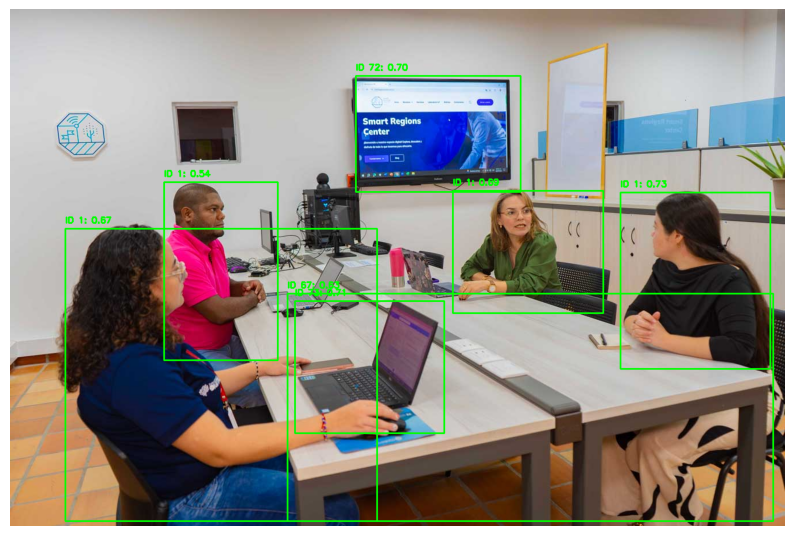

In [ ]:
# Dibujar las detecciones sobre la imagen
for i in range(int(detections['num_detections'])):
    ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
    class_id = int(detections['detection_classes'][0][i].numpy())
    score = detections['detection_scores'][0][i].numpy()
    if score > 0.5:
        (h, w) = image.shape[:2]
        (startX, startY, endX, endY) = (int(xmin * w), int(ymin * h), int(xmax * w), int(ymax * h))
        cv2.rectangle(image_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image_rgb, f'ID {class_id}: {score:.2f}', (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Mostrar imagen con detecciones
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Dado que en la imagen anterior las etiquedas fueron sus ids y no el nombre de las clases,usamos el archivo mscoco_label_map.pbtxt donde estan todas las etiquetas para ponerlas en la imagen.

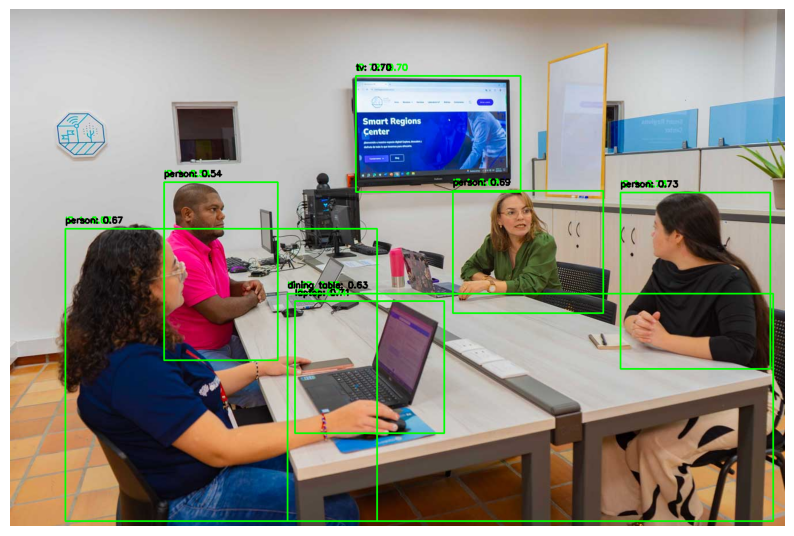

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import json
import os

# Descargar y cargar etiquetas COCO desde la fuente oficial
def load_labels():
    labels_url = "https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt"
    labels_path = "mscoco_label_map.pbtxt"

    # Descargar si no existe
    if not os.path.exists(labels_path):
        urllib.request.urlretrieve(labels_url, labels_path)

    # Procesar archivo de etiquetas
    label_map = {}
    with open(labels_path, 'r') as f:
        lines = f.readlines()
        for i in range(len(lines)):
            if "id:" in lines[i]:
                class_id = int(lines[i].split("id:")[1].strip())
                class_name = lines[i + 1].split("display_name:")[1].strip().replace('"', '')
                label_map[class_id] = class_name

    return label_map

labels = load_labels()


# Dibujar las detecciones sobre la imagen
for i in range(int(detections['num_detections'])):
    ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
    class_id = int(detections['detection_classes'][0][i].numpy())
    score = detections['detection_scores'][0][i].numpy()
    if score > 0.5:
        (h, w) = image.shape[:2]
        (startX, startY, endX, endY) = (int(xmin * w), int(ymin * h), int(xmax * w), int(ymax * h))
        class_name = labels.get(class_id, 'Desconocido')
        cv2.rectangle(image_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image_rgb, f'{class_name}: {score:.2f}', (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Mostrar imagen con detecciones
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


## 2. Métodos para la Detección de Objetos

Se estudiarán distintos enfoques para la detección de objetos:

Creación de un detector desde cero: Diseño y entrenamiento de un modelo personalizado con TensorFlow y Keras.

Uso de modelos preentrenados: Implementación de modelos populares como:


*   YOLO (You Only Look Once)
*   SSD (Single Shot MultiBox Detector)
*   Faster R-CNN
*   Modelos disponibles en TensorFlow Model Zoo (COCO, Open Images, etc.)

| Método | Velocidad | Precisión | Aplicación |
|--------|----------|-----------|------------|
| YOLO   | Alta     | Media     | Tiempo real |
| SSD    | Media    | Alta      | Dispositivos móviles |
| Faster R-CNN | Baja | Muy alta | Imágenes estáticas |

En este ejercicio vamos a usar el modelo Yolo que no va a permitir etiquetar también los objetos detectados.

# Yolo
You Only Look Once (YOLO) es un algoritmo de detección de objetos en tiempo real de última generación introducido en 2015 por Joseph Redmon, Santosh Divvala, Ross Girshick y Ali Farhadi en su famoso trabajo de investigación "You Only Look Once: Detección de Objetos Unificada y en Tiempo Real".

Los autores enmarcan el problema de la detección de objetos como un problema de regresión en lugar de una tarea de clasificación, separando espacialmente las cajas delimitadoras y asociando probabilidades a cada una de las imágenes detectadas mediante una única red neuronal convolucional (CNN).

Aqui vamos a hacer un ejemplo aplicado de Yolo usando a versión 8.

Si se requiere debe instalar todas las librerias y depencias. En google Colab no es necesario.

Cargaremos nuevamente la imagen.

# Arquitectura YOLO
La arquitectura de YOLO es similar a la de GoogleNet. Como se ilustra a continuación, tiene en total 24 capas convolucionales, cuatro capas de agrupamiento máximo y dos capas totalmente conectadas.

[enlace al paper original](https://arxiv.org/pdf/1506.02640)

PyTorch y YOLO para realizar detección de objetos en una imagen de prueba. Aquí está la explicación paso a paso:

##**Importación de librerías**

torch: Se usa para cargar y ejecutar el modelo YOLO.

PIL.Image: Permite manipular imágenes en Python.

urllib.request: Se usa para descargar imágenes desde una URL.

*Función download_image(url, filename)*

Descarga una imagen desde una URL y la guarda en un archivo local.


##**Carga del modelo YOLO**

YOLO('yolov8n.pt'): Carga el modelo YOLOv8 preentrenado con pesos en yolov8n.pt.

##**Realizar detección en la imagen**

Convierte la imagen en formato PIL (Image.fromarray(image_rgb)).

Pasa la imagen al modelo para realizar la detección (results = model(...)).


##Muestra los resultados de detección
(results[0].show()).

Ultralytics proporciona soporte para varios conjuntos de datos con el fin de facilitar tareas de visión por ordenador como la detección, la segmentación de instancias, la estimación de poses, la clasificación y el seguimiento multiobjeto.

https://docs.ultralytics.com/es/datasets/#object-detection

In [ ]:
#Si va a ejecutar por primera vez, instale la libreria de yolo, esto signfica quitar le comentario "#", pero debe reiniciar sesión antes de continuar.
#Para reiniciar sesion vaya "Entor de ejecución" y "Reiniciar sesión"
#Cuando quiera seguir ejecutando recuerde volver a comentar.

!pip install yolov8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.7 MB/s eta 0:00:00
   

In [ ]:
# Descargar imagen de prueba
def download_image(url, filename):
    urllib.request.urlretrieve(url, filename)

image_url = 'https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Centro-de-Desarrollo-Tecnologico-4.jpg'
image_path = 'imagen_prueba.jpg'
download_image(image_url, image_path)

# Cargar imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_tensor = tf.convert_to_tensor([image_rgb], dtype=tf.uint8)

In [ ]:
!pip install ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 310MB/s]



0: 448x640 5 persons, 4 chairs, 1 potted plant, 1 tv, 3 laptops, 49.9ms
Speed: 18.1ms preprocess, 49.9ms inference, 356.8ms postprocess per image at shape (1, 3, 448, 640)


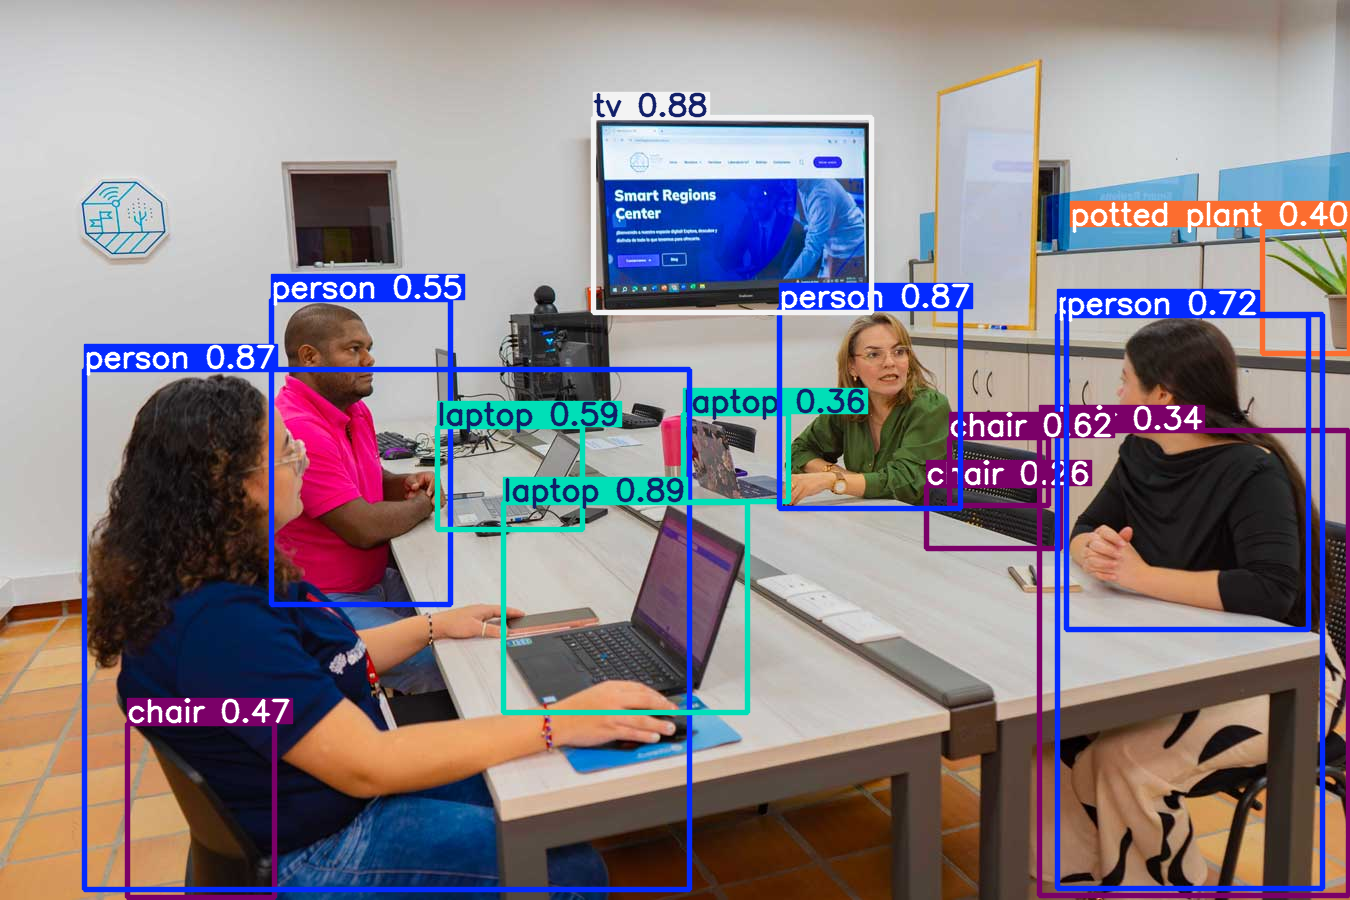

In [ ]:
import torch
from PIL import Image
import urllib.request

# Descargar imagen de prueba
def download_image(url, filename):
    urllib.request.urlretrieve(url, filename)

# Descargar imagen de prueba
def download_image(url, filename):
    urllib.request.urlretrieve(url, filename)

# Cargar modelo preentrenado
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)


# Realizar detección en imagen
# The model expects a filename, PIL Image, or list of filenames/PIL Images.
# Convert the image_rgb to a PIL Image.
results = model(Image.fromarray(image_rgb))
# Access the first element of the results list, which should be the Results object.
results[0].show() # or .print()